In [11]:
import numpy as np

In [12]:
ground_data = np.loadtxt('/spslam/kitti-odometry-gray/poses/07.txt')

In [14]:
ground_data[0]

array([1.000000e+00, 1.197625e-11, 1.704638e-10, 5.551115e-17,
       1.197625e-11, 1.000000e+00, 3.562503e-10, 0.000000e+00,
       1.704638e-10, 3.562503e-10, 1.000000e+00, 2.220446e-16])

In [15]:
ground_time = np.loadtxt('/spslam/kitti-odometry-gray/sequences/07/times.txt')

In [16]:
ground_time

array([0.000000e+00, 1.038752e-01, 2.078941e-01, ..., 1.141216e+02,
       1.142256e+02, 1.143296e+02])

In [47]:
file = open('/spslam/colmap_workspace/images.txt')
l = file.readlines()
file.close()

In [63]:
l[0:5]

['# Image list with two lines of data per image:\n',
 '#   IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME\n',
 '#   POINTS2D[] as (X, Y, POINT3D_ID)\n',
 '# Number of images: 1101, mean observations per image: 1731.0081743869209\n',
 '1 0.034413547937537751 0.014118922843591663 0.99921659958470133 0.013511138015509062 -2.6485325159469739 0.043249095594097169 -0.54944749166201745 2 000001.png\n']

In [64]:
for i in range(len(l)//2):
    if 2*i+4 < len(l):
        print(l[2*i+4])

1 0.034413547937537751 0.014118922843591663 0.99921659958470133 0.013511138015509062 -2.6485325159469739 0.043249095594097169 -0.54944749166201745 2 000001.png

2 0.030870796329871421 0.013857636955500947 0.99933735281544767 0.013409515270228892 -2.6522012624534734 0.041568845203668617 -0.53300284087491234 2 000002.png

3 0.027108661412825731 0.013749918339591653 0.9994536849141018 0.012976591759112283 -2.6559285736832168 0.040400113885360057 -0.51543825127552767 2 000003.png

4 0.022487459000457073 0.013461662317364955 0.99958166740622834 0.01223061816673052 -2.6603592185965783 0.037968664989671164 -0.49343658443378252 2 000004.png

5 0.016729472753985404 0.01345673196692038 0.99970473754634692 0.011378876637604228 -2.6655918534903154 0.036933857709303339 -0.46554209893520243 2 000005.png

6 0.0099060292773793992 0.013596829849103322 0.99980065617864511 0.010753822890528749 -2.6713715883709979 0.036805572131777299 -0.43222705946961065 2 000006.png

7 0.0017358218462014004 0.0137064994

In [173]:
res_data = np.loadtxt('/spslam/colmap_workspace/images.txt', usecols = [1,2,3,4,5,6,7])[0::2]

In [174]:
res_data[0]

array([ 0.03441355,  0.01411892,  0.9992166 ,  0.01351114, -2.64853252,
        0.0432491 , -0.54944749])

In [175]:
# converting quaternion to scalar-last format
np.insert(res_data[0][0:4], 4, res_data[0][0])[1:5]

array([0.01411892, 0.9992166 , 0.01351114, 0.03441355])

In [176]:
from scipy.spatial.transform import Rotation as R
x = np.insert(res_data[0][0:4], 4, res_data[0][0])[1:5] # uses scalar-last format
r = R.from_quat(x)

In [177]:
x

array([0.01411892, 0.9992166 , 0.01351114, 0.03441355])

In [178]:
r.as_matrix()

array([[-0.99723273,  0.02728579,  0.0691547 ],
       [ 0.02914566,  0.99923621,  0.02602934],
       [-0.06839165,  0.02797287, -0.99726631]])

In [179]:
camera_center

array([-2.68004145,  0.04442087, -0.36591274])

In [180]:
np.concatenate((camera_center, x))

array([-2.68004145,  0.04442087, -0.36591274,  0.01411892,  0.9992166 ,
        0.01351114,  0.03441355])

In [152]:
# Another method to calculate rotation matrix from quaternion
# import numpy as np

# def quaternion_to_rotation_matrix(q):
#     q = np.array(q)
#     q /= np.linalg.norm(q)  # Normalize quaternion
#     qw, qx, qy, qz = q
#     R = np.array([
#         [1 - 2*(qy**2 + qz**2), 2*(qx*qy - qw*qz), 2*(qx*qz + qw*qy)],
#         [2*(qx*qy + qw*qz), 1 - 2*(qx**2 + qz**2), 2*(qy*qz - qw*qx)],
#         [2*(qx*qz - qw*qy), 2*(qy*qz + qw*qx), 1 - 2*(qx**2 + qy**2)]
#     ])
#     return R

# # Example usage:
# q = [0.03441355,  0.01411892,  0.9992166 ,  0.01351114]  # Example quaternion [w, x, y, z]
# R = quaternion_to_rotation_matrix(q)
# print("Rotation matrix:")
# print(R)

In [129]:
# Invert the rotation matrix
rotation_matrix_transpose = np.transpose(r.as_matrix())
print(rotation_matrix_transpose)

[[-0.99723273  0.02914566 -0.06839165]
 [ 0.02728579  0.99923621  0.02797287]
 [ 0.0691547   0.02602934 -0.99726631]]


In [135]:
# Calculate camera center
translation = res_data[0][4:]
camera_center = -np.dot(rotation_matrix_transpose, translation)

In [136]:
camera_center

array([-2.68004145,  0.04442087, -0.36591274])

In [153]:
len(res_data)

1101

In [181]:
empty_list = []
from scipy.spatial.transform import Rotation as R
for i in range(len(res_data)):
    x = np.insert(res_data[i][0:4], 4, res_data[i][0])[1:5] # uses scalar-last format
    r = R.from_quat(x).as_matrix()
    # Calculate camera center
    translation = res_data[i][4:]
    camera_center = -np.dot(np.transpose(r), translation)    
    empty_list.append(np.concatenate((camera_center, x)))

In [183]:
res_format = np.array(empty_list)

In [184]:
res_format[0]

array([-2.68004145,  0.04442087, -0.36591274,  0.01411892,  0.9992166 ,
        0.01351114,  0.03441355])

In [210]:
import matplotlib.pyplot as plt
import sys

def gen_data(ground_time, res_time, ground_data):
    ground_time = ground_time
    res_time = res_time
    ground_data = ground_data
    time_mark = 0
    time = []
    
    data_1 = []

    for num in range(len(ground_data)):
        data_1.append(np.concatenate(([ground_time[num]], ground_data[num])))

    data_2 = []




    for num in range(len(res_time)):
# 		while not np.allclose(data_1[time_mark][0], res_time[num][0]):
# 		    time_mark+=1
        data_2.append(data_1[time_mark])
        time_mark+=1
    return data_2


def get_coo(data):
	points = [[],[],[]]
	for num in range(len(data)):
		points[0].append(data[num][4])
		points[1].append(data[num][8])
		points[2].append(data[num][12])
	return points


def get_points(data):
	points = [[],[],[]]
	for num in range(len(data)):
		points[0].append(data[num][0])
		points[1].append(data[num][1])
		points[2].append(data[num][2])
	return points


def align(model,data):
    """Align two trajectories using the method of Horn (closed-form).
    
    Input:
    model -- first trajectory (3xn)
    data -- second trajectory (3xn)
    
    Output:
    rot -- rotation matrix (3x3)
    trans -- translation vector (3x1)
    trans_error -- translational error per point (1xn)
    
    """
    np.set_printoptions(precision=3,suppress=True)
    model_mean=[[model.mean(1)[0]], [model.mean(1)[1]], [model.mean(1)[2]]]
    data_mean=[[data.mean(1)[0]], [data.mean(1)[1]], [data.mean(1)[2]]]
    model_zerocentered = model - model_mean
    data_zerocentered = data - data_mean
    
    W = np.zeros( (3,3) )
    for column in range(model.shape[1]):
        W += np.outer(model_zerocentered[:,column],data_zerocentered[:,column])
    U,d,Vh = np.linalg.linalg.svd(W.transpose())
    S = np.matrix(np.identity( 3 ))
    if(np.linalg.det(U) * np.linalg.det(Vh)<0):
        S[2,2] = -1
    rot = U*S*Vh

    rotmodel = rot*model_zerocentered
    dots = 0.0
    norms = 0.0

    for column in range(data_zerocentered.shape[1]):
        dots += np.dot(data_zerocentered[:,column].transpose(),rotmodel[:,column])
        normi = np.linalg.norm(model_zerocentered[:,column])
        norms += normi*normi

    s = float(dots/norms)    

    # print ("scale: %f " % s) 
    
    trans = data_mean - s*rot * model_mean
    
    model_aligned = s*rot * model + trans
    alignment_error = model_aligned - data
    
    trans_error = np.sqrt(np.sum(np.multiply(alignment_error,alignment_error),0)).A[0]
        
    return rot,trans,trans_error, s

compared_pose_pairs 1101 pairs
absolute_translational_error.rmse 22.727012 m
absolute_translational_error.mean 20.508427 m
absolute_translational_error.median 18.476708 m
absolute_translational_error.std 9.793952 m
absolute_translational_error.min 6.531822 m
absolute_translational_error.max 44.842789 m


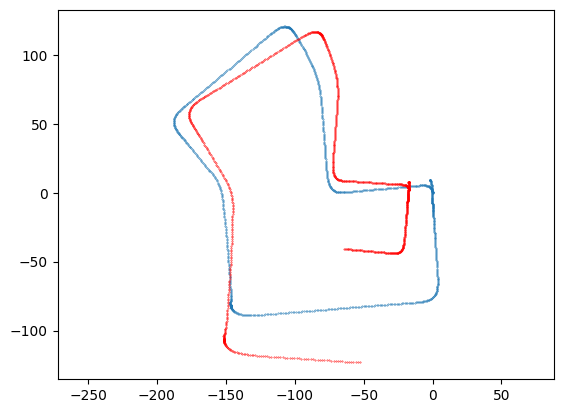

In [211]:
data= gen_data(ground_time, res_format, ground_data)
ground_points = np.asarray(get_coo(data))
re_points = np.asarray(get_points(res_format))
# print(type(ground_points))
rot,trans,trans_error,s = align(re_points, ground_points)
# print(rot)
re_fpoints = s*rot*re_points+trans
# print(re_fpoints[0])
# print(trans_error)
plt.axis('equal')
plt.scatter(ground_points[0], ground_points[2], s=0.1)
plt.scatter(list(re_fpoints[0]), list(re_fpoints[2]), s=0.1, c='red')
aa = list(re_fpoints[0])
x = aa[0].tolist()
aa = list(re_fpoints[2])
y = aa[0].tolist()

print ("compared_pose_pairs %d pairs"%(len(trans_error)))
print ("absolute_translational_error.rmse %f m"%np.sqrt(np.dot(trans_error,trans_error) / len(trans_error)))
print ("absolute_translational_error.mean %f m"%np.mean(trans_error))
print ("absolute_translational_error.median %f m"%np.median(trans_error))
print ("absolute_translational_error.std %f m"%np.std(trans_error))
print ("absolute_translational_error.min %f m"%np.min(trans_error))
print ("absolute_translational_error.max %f m"%np.max(trans_error))

# for num in range(len(ground_points[0])):
# plt.plot([ground_points[0][num], x[0][num]], [ground_points[2][num], y[0][num]], c = 'green')
plt.show()